In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'cleaned_df.csv')
df

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...
1047311,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1047312,M,NASHIK,27311.42,18/9/16,183734,460.0
1047313,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1047314,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [188]:
df.isnull().sum()

CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [189]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.047316e+06,1.047316e+06,1.047316e+06
mean,1.152750e+05,1.570937e+05,1.573781e+03
std,8.460319e+05,5.126570e+04,6.575370e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.754570e+03,1.240310e+05,1.610000e+02
50%,1.681713e+04,1.642310e+05,4.595200e+02
75%,5.749861e+04,2.000140e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [190]:
print(df.CustLocation.unique().tolist()), len(df.CustLocation.unique().tolist())

['JAMSHEDPUR', 'JHAJJAR', 'MUMBAI', 'NAVI MUMBAI', 'ITANAGAR', 'GURGAON', 'MOHALI', 'GUNTUR', 'AHMEDABAD', 'THANE', 'PUNE', 'NEW DELHI', 'NO 3 KALYANI NAGAR PUNE', 'SECUNDERABAD', 'WAYS PANCHKUVA AHMEDABAD', 'LUCKNOW', 'DELHI', 'CHENNAI', 'GRAM PANCHAYTH HYDERABAD', 'GHAZIABAD', 'BANGALORE', 'GUWAHATI', 'DHANBAD', 'MUKTSAR', 'SOCORRO', 'ANDHERI (EAST) MUMBAI', 'AURANGABAD', 'KOTA', 'JAIPUR', 'K V RANGAREDDY', 'MUZAFFARNAGAR', 'BURDWAN', 'LUDHIANA', 'NOIDA', 'AGRA', 'SHAHJAHANPUR', 'DIST RAIGAD PANVEL', 'DEHRADUN', 'HYDERABAD', 'GODDA', 'REWARI (HARYANA)', 'NELLORE', 'ADIPUR', 'DUBAI', 'ALLAHABAD', 'BATHINDA', 'NASHIK', 'JAMMU', 'JABALPUR', 'KASHIPUR', 'ETAH', 'KOLKATA', 'VADODARA', 'TIRUPUR', 'SURAT', 'NAGO THANE', 'KARUR DT', 'CHITTO0R', 'INDORE', 'OFF CUBBON ROAD BANGALORE', 'PIMPALI', 'PUMP HINJEWADI PUNE', 'KANJURMARG EAST', 'SOUTH 24 PARGANAS', 'MIRABHAYANDER THANE MIRA ROAD', 'SAHARANPUR', 'CHANDIGARH', 'COMPLEX GURGAON', 'PARK PHASE-I HINJEWADI PUNE', 'GULBARGA', 'KANPUR', 'VISA

(None, 9351)

In [191]:
no_trans_location = df.groupby('CustLocation')['TransactionDate'].count().sort_values(ascending=False)
no_trans_location[:10]

CustLocation
MUMBAI       102815
NEW DELHI     84920
BANGALORE     81533
GURGAON       73818
DELHI         71019
NOIDA         32784
CHENNAI       30009
PUNE          25845
HYDERABAD     23049
THANE         21480
Name: TransactionDate, dtype: int64

Text(0, 0.5, 'No. of transactions')

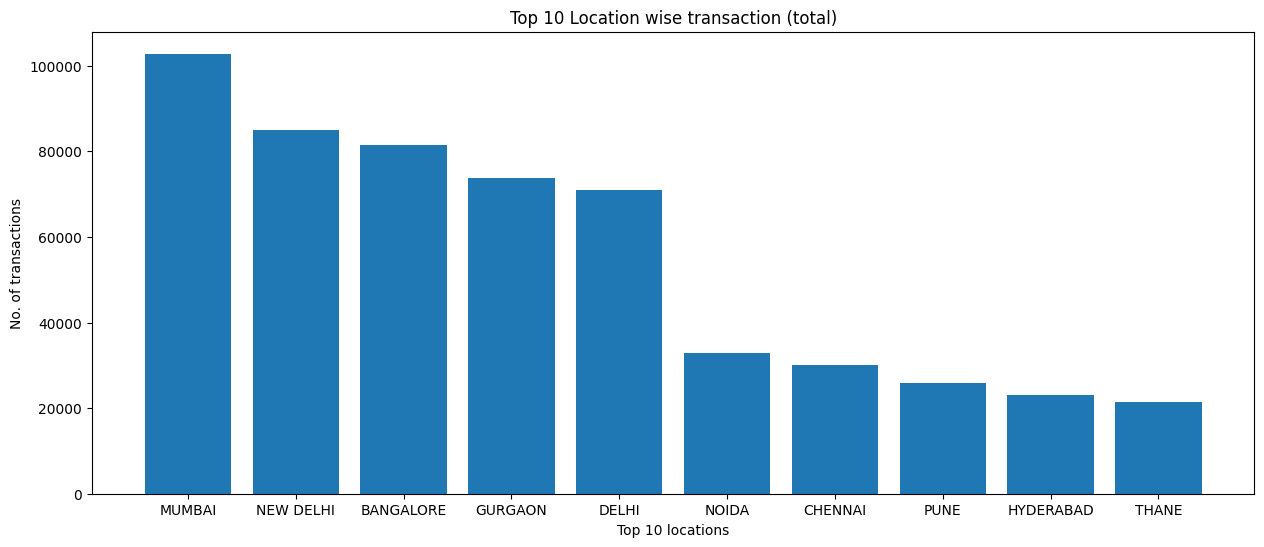

In [192]:
plt.figure(figsize=(15, 6))
plt.bar(no_trans_location[:10].index, no_trans_location[:10].values)
plt.title('Top 10 Location wise transaction (total)')
plt.xlabel('Top 10 locations')
plt.ylabel('No. of transactions')

In [193]:
location_trans_amount = df.groupby('CustLocation')['TransactionAmount (INR)'].sum().sort_values(ascending=False)
location_trans_amount[:10]

CustLocation
MUMBAI       1.788357e+08
NEW DELHI    1.606811e+08
BANGALORE    1.183155e+08
GURGAON      1.120947e+08
DELHI        1.062249e+08
KOLKATA      6.052904e+07
CHENNAI      4.463782e+07
NOIDA        4.446343e+07
PUNE         3.956597e+07
HYDERABAD    3.617739e+07
Name: TransactionAmount (INR), dtype: float64

Text(0, 0.5, 'Amount')

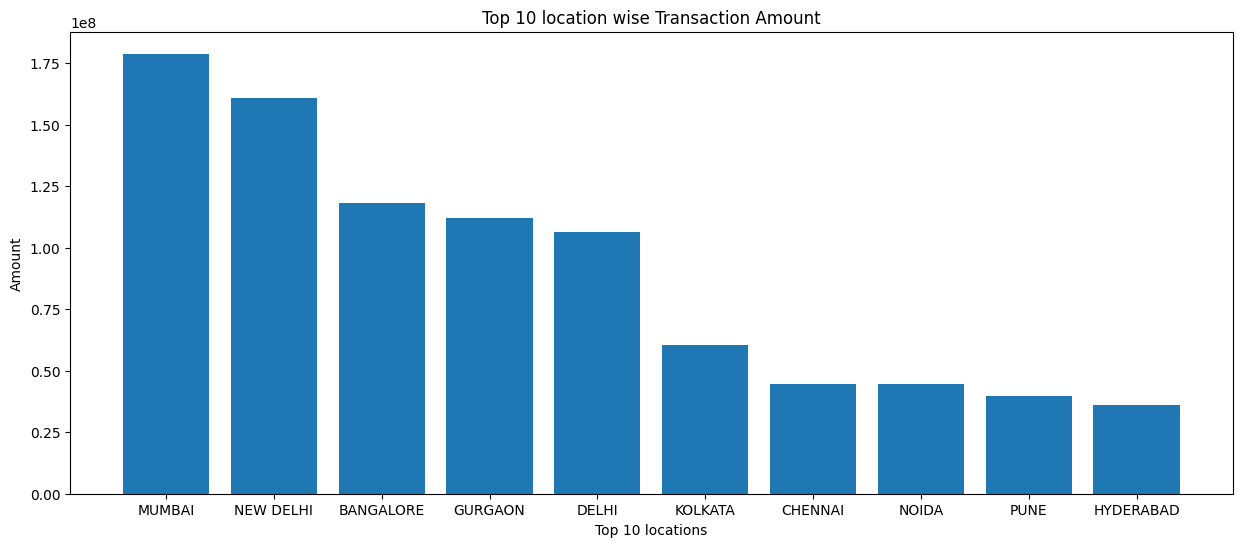

In [197]:
plt.figure(figsize=(15, 6))
plt.bar(location_trans_amount[:10].index, [int(i) for i in location_trans_amount.values[:10]])
plt.title('Top 10 location wise Transaction Amount')
plt.xlabel('Top 10 locations')
plt.ylabel('Amount (Scientific Notation)')

In [198]:
location_balance = df.groupby('CustLocation')['CustAccountBalance'].sum().sort_values(ascending=False)
location_balance[:10]

CustLocation
NEW DELHI    1.639319e+10
MUMBAI       1.581639e+10
GURGAON      1.307008e+10
BANGALORE    8.364160e+09
DELHI        7.664694e+09
NOIDA        3.825277e+09
KOLKATA      3.296088e+09
HYDERABAD    3.014091e+09
CHENNAI      2.730870e+09
PUNE         2.552237e+09
Name: CustAccountBalance, dtype: float64

Text(0, 0.5, 'Account Balance')

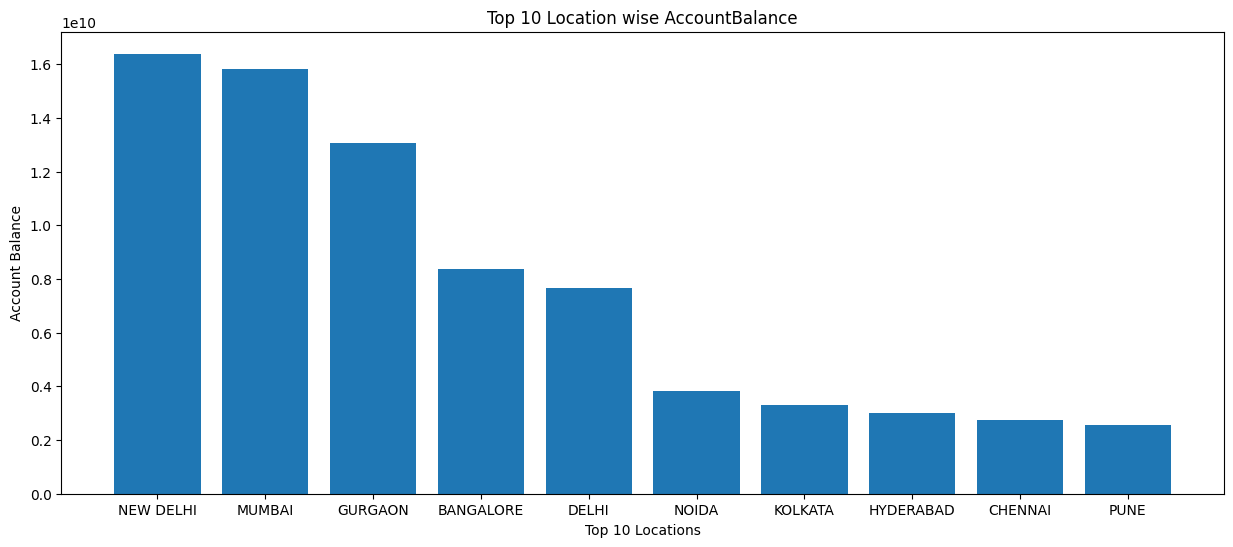

In [199]:
plt.figure(figsize=(15, 6))
plt.bar(location_balance[:10].index, [int(i) for i in location_balance[:10].values])
plt.title('Top 10 Location wise AccountBalance')
plt.xlabel('Top 10 Locations')
plt.ylabel('Account Balance (Scientific Notation)')

In [150]:
gender_no_trans = df.groupby('CustGender')['TransactionDate'].count().sort_values(ascending=False)
gender_no_trans

CustGender
M    765410
F    281905
T         1
Name: TransactionDate, dtype: int64

Text(0, 0.5, 'Number of Transactions')

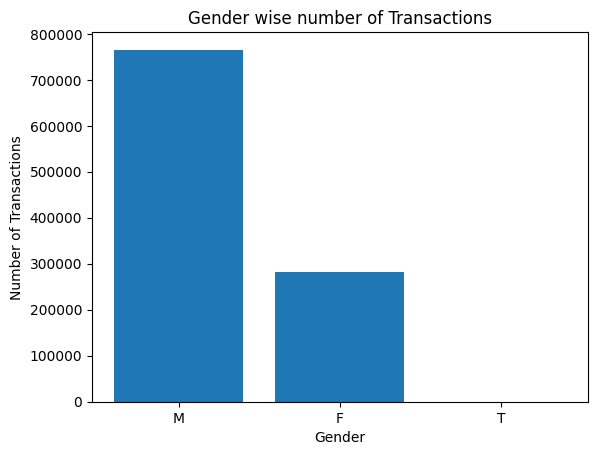

In [200]:
plt.bar(gender_no_trans.index, [int(i)for i in gender_no_trans.values])
plt.title('Gender wise number of Transactions')
plt.xlabel('Gender')
plt.ylabel('Number of Transactions (Scientific Notation)')

In [201]:
gender_acc_balance = df.groupby('CustGender')['CustAccountBalance'].sum()
gender_acc_balance

CustGender
F    3.089412e+10
M    8.983516e+10
T    5.005000e+04
Name: CustAccountBalance, dtype: float64

Text(0, 0.5, 'Account Balance (Scientific Notation)')

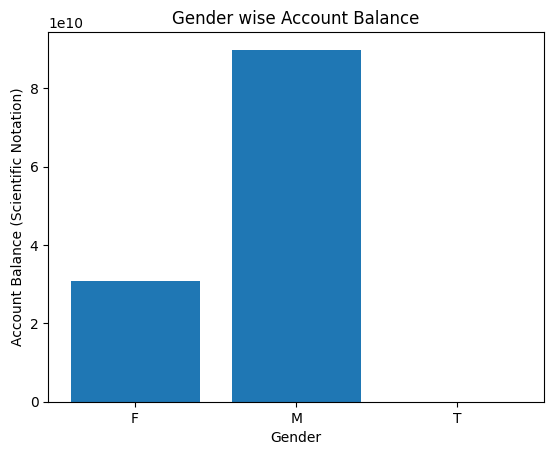

In [213]:
plt.bar(gender_acc_balance.index, [float(i)for i in gender_acc_balance.values])
plt.title('Gender wise Account Balance')
plt.xlabel('Gender')
plt.ylabel('Account Balance (Scientific Notation)')

In [214]:
gender_trans_amound = df.groupby('CustGender')['TransactionAmount (INR)'].sum()
gender_trans_amound[:10]

CustGender
F    4.667698e+08
M    1.181444e+09
T    3.250000e+04
Name: TransactionAmount (INR), dtype: float64

Text(0, 0.5, 'Transaction Amount (Scientifit Notation)')

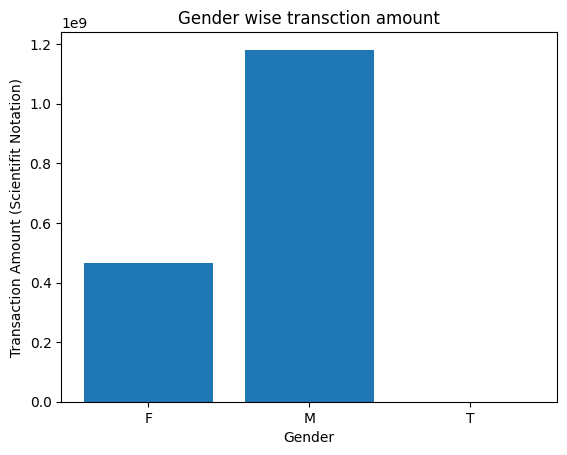

In [215]:
plt.bar(gender_trans_amound.index, gender_trans_amound.values)
plt.title('Gender wise transction amount')
plt.xlabel('Gender')
plt.ylabel('Transaction Amount (Scientifit Notation)')

In [253]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format="%d/%m/%y")

In [254]:
date_trans_amount = df.groupby('TransactionDate')['TransactionAmount (INR)'].sum()
sorted_date_trans_amount = date_trans_amount.sort_index()
sorted_date_trans_amount[:10]

TransactionDate
2016-08-01    29772239.16
2016-08-02    30381348.47
2016-08-03    31127143.56
2016-08-04    35630461.09
2016-08-05    34746266.12
2016-08-06    47481323.14
2016-08-07    45691116.03
2016-08-08    30091182.57
2016-08-09    33470570.68
2016-08-10    31966519.41
Name: TransactionAmount (INR), dtype: float64

Text(0, 0.5, 'Amount in Scientific Notation')

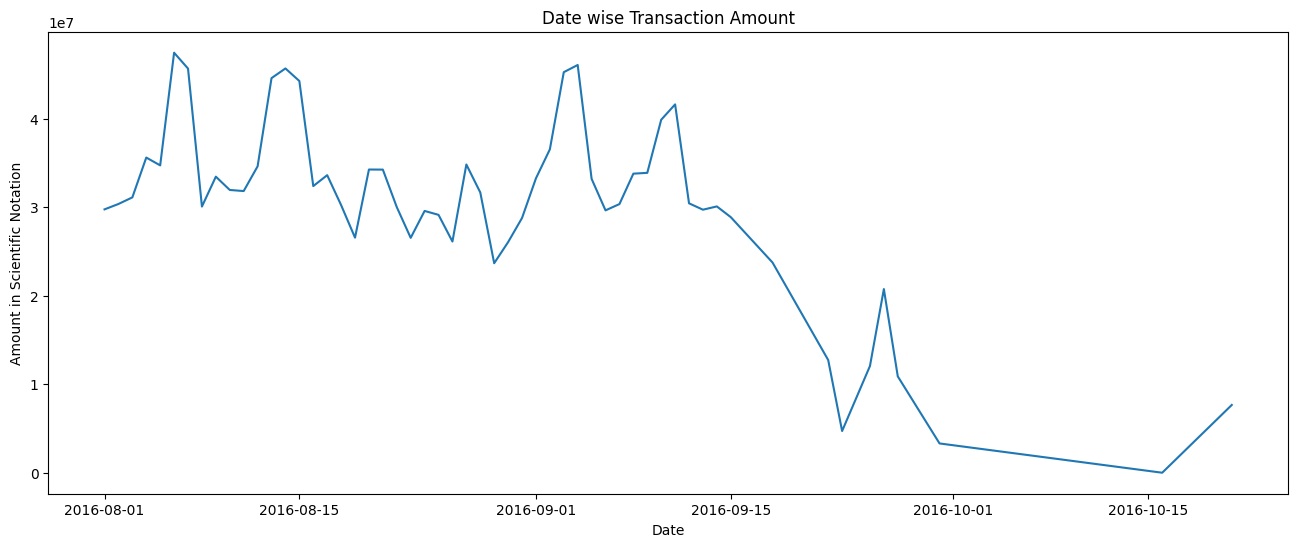

In [256]:
plt.figure(figsize=(16, 6))
plt.plot(sorted_date_trans_amount.index, sorted_date_trans_amount.values)
plt.title('Date wise Transaction Amount')
plt.xlabel('Date')
plt.ylabel('Amount in Scientific Notation')

In [258]:
date_account_balance = df.groupby('TransactionDate')['CustAccountBalance'].sum()
date_account_balance[:10]

TransactionDate
2016-08-01    2.199465e+09
2016-08-02    2.323540e+09
2016-08-03    2.313225e+09
2016-08-04    2.351500e+09
2016-08-05    2.105659e+09
2016-08-06    2.869625e+09
2016-08-07    2.814425e+09
2016-08-08    2.217088e+09
2016-08-09    2.203493e+09
2016-08-10    2.176099e+09
Name: CustAccountBalance, dtype: float64

Text(0, 0.5, 'Acount Balance')

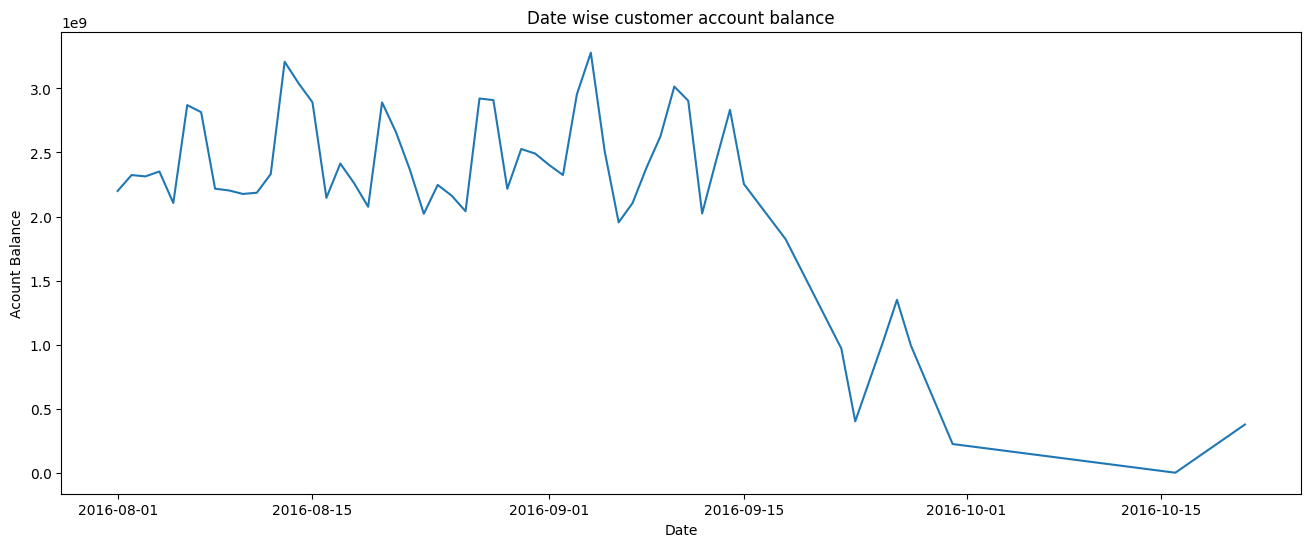

In [260]:
plt.figure(figsize=(16, 6))
plt.plot(date_account_balance.index, date_account_balance.values)
plt.title('Date wise customer account balance')
plt.xlabel('Date')
plt.ylabel('Acount Balance')

In [265]:
date_transaction = df.groupby('TransactionDate')['TransactionDate'].count()
date_transaction[:10]

TransactionDate
2016-08-01    20408
2016-08-02    20924
2016-08-03    20587
2016-08-04    20654
2016-08-05    21069
2016-08-06    26558
2016-08-07    27232
2016-08-08    21016
2016-08-09    21803
2016-08-10    21620
Name: TransactionDate, dtype: int64

Text(0, 0.5, 'No of Transactions')

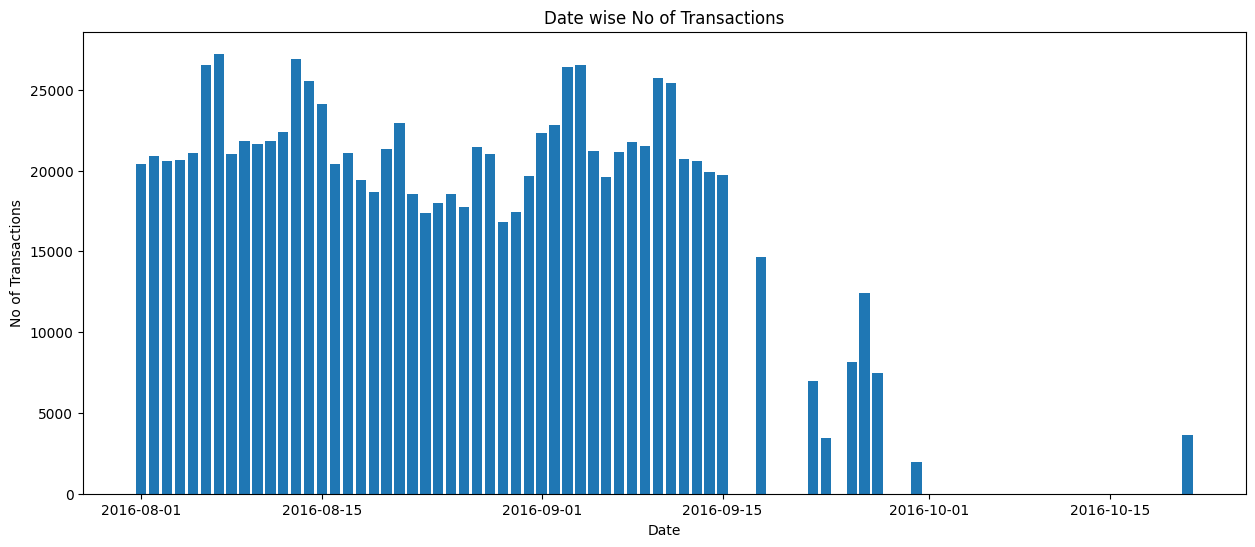

In [271]:
plt.figure(figsize=(15, 6))
plt.bar(date_transaction.index, date_transaction.values)
plt.title('Date wise No of Transactions')
plt.xlabel("Date")
plt.ylabel('No of Transactions')